# Advanced Data Science Capstone

## Correlation of air pollution and Prevalence of Heart failures in Germany  

## Model definition: Linear regression

### The deliverables
The deliverables of the current stage:

 - The models: at least one deep learning and at least one non-deep learning algorithm
 - Compare and document models performance
 - At least one additional iteration in the process model involving at least the feature creation task and record impact on model performance (e.g. data normalizing, PCA, …)
 
###  Architectural Decisions Document (ADD)

 - The choice of specific technologies / frameworks 
 - All decisions should be documented in the ADD
 
###  Result of the stage

 - Save the notebook according to the process model’s naming convention
 - Proceed to the model training task 
 
 First of all the necessary libraries and the feature matrices created at the Feature Engineering stage are loaded:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


FeatureSetDenseMean = pd.read_csv('Capstone.FeatureEng/Capstone.feature_eng.DenseMean.1.0.csv', index_col=None)
FeatureSetLongMean = pd.read_csv('Capstone.FeatureEng/Capstone.feature_eng.LongMean.1.0.csv', index_col=None)

FeatureSetDensePerc50 = pd.read_csv('Capstone.FeatureEng/Capstone.feature_eng.DensePerc50.1.0.csv', index_col=None)
FeatureSetDensePerc75 = pd.read_csv('Capstone.FeatureEng/Capstone.feature_eng.DensePerc75.1.0.csv', index_col=None)

FeatureSetLongPerc50 = pd.read_csv('Capstone.FeatureEng/Capstone.feature_eng.LongPerc50.1.0.csv', index_col=None)
FeatureSetLongPerc75 = pd.read_csv('Capstone.FeatureEng/Capstone.feature_eng.LongPerc75.1.0.csv', index_col=None)

#### Linear Regression
##### Multivariate regression
Due to the fact, that resulting feature matrices are of quite small size (less than 200 observations and 5 features), the Linear Regression is a natural choice for initial analysis of the data set. 

In [2]:
FeatureSet = FeatureSetLongPerc75

print(FeatureSet.head(3))

X, y = FeatureSet.drop(['CountyID', 'DiseaseR'], axis=1), FeatureSet['DiseaseR']
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

### Single variable regression
#Xsingle = X[:,0]
#Xsingle = sm.add_constant(Xsingle)
#model_LR1=sm.OLS(y, Xsingle).fit()

#plt.scatter(FeatureSetDensePerc50['DiseaseR'], FeatureSetDensePerc50['NOx'])

#model_LR1=ols("DiseaseR ~ NO + NO2 + PM1", data = FeatureSet).fit()
model_LR1=ols("y ~ X", data = FeatureSet).fit()

print(anova_lm(model_LR1))
print(model_LR1.summary())



   CountyID  DiseaseR     NO    NO2     PM1
0     16072       8.7    7.0   21.0   275.0
1     16073       8.3  747.0  538.0  1456.0
2      8128       8.0  701.0  511.0  1559.0
             df      sum_sq   mean_sq         F  PR(>F)
X           3.0    0.560654  0.186885  0.193705  0.9006
Residual  195.0  188.133618  0.964788       NaN     NaN
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.1937
Date:                Thu, 08 Aug 2019   Prob (F-statistic):              0.901
Time:                        13:56:25   Log-Likelihood:                -276.78
No. Observations:                 199   AIC:                             561.6
Df Residuals:                     195   BIC:                             574.7
Df Model:               

The results shows very high p-values, showing that the linear regression coefficients are  ...
The same linear regression model can be realized by means of **PyTorch**:

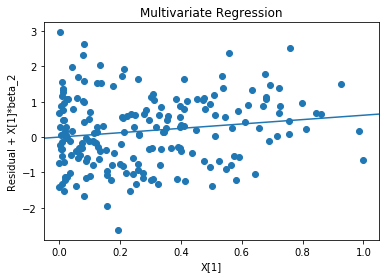

In [3]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_ccpr(model_LR1, 2, ax=ax)
ax.set_title("Multivariate Regression");

#sm.graphics.plot_partregress(endog='DiseaseR', exog_i='NOx', exog_others=['PM1', 'NO', 'NO2', 'O3'],data=FeatureSetDensePerc50, obs_labels=False)
##sm.graphics.plot_partregress(endog='DiseaseR', exog_i='NO', exog_others=['PM1'],data=FeatureSetDensePerc50, obs_labels=False)


##### Single variable rergession

   CountyID  DiseaseR     NO    NO2     PM1
0     16072       8.7    7.0   21.0   275.0
1     16073       8.3  747.0  538.0  1456.0
2      8128       8.0  701.0  511.0  1559.0


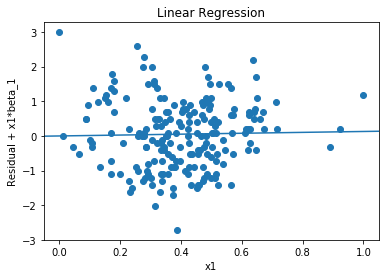

In [4]:
FeatureSet = FeatureSetLongPerc75

print(FeatureSet.head(3))

X, y = FeatureSet.drop(['CountyID', 'DiseaseR'], axis=1), FeatureSet['DiseaseR']
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

# Selecting the regression variable:
NumVarRegress=2

Xsingle = X[:,NumVarRegress]
Xsingle = sm.add_constant(Xsingle)
model_LR2=sm.OLS(y, Xsingle).fit()

fig, ax = plt.subplots()
fig = sm.graphics.plot_ccpr(model_LR2, 1, ax=ax)
ax.set_title("Linear Regression");


### Challenges
The large p-values shows, that no reliable metrics of accuracy can be constructed within this approach.
Another confounder variable, missed in the study, is the average age of the county. The problem is, that Germany is still very separated into "west" and "east", the average age in eastern and western counties differs significantly.
For details see https://www.demografie-portal.de/SharedDocs/Aktuelles/DE/2015/151208_BiB_Durchschnittsalter_Deutschland.html (in German), the map of average age for counties is shown below:

![](https://www.demografie-portal.de/SharedDocs/Bilder/Aktuelles/2015/151208_BiB_Durchschnittsalter_Deutschland.png?__blob=normal&v=2)

This becomes an extremely important issue, if e.g. mortality from heart failures is being studied based on open published data: despite of lack of industry/transportation and pollutant emissions in the east counties, the heart failures prevalence is much higher due to significantly larger average age.

### Model
As far as regression models seems to be not appropriate for the problem, one can switch to classification approaches, showing e.g. whether selected county is of high risk of the disease. 